In [60]:
 # Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


In [61]:
# Study data files
mouse_metadata_path = "Mouse_metadata.csv"

In [62]:
study_results_path = "Study_results.csv"

In [63]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)

In [64]:
mouse_metadata.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [65]:
study_results = pd.read_csv(study_results_path)

In [66]:
study_results.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [67]:
# Combine the data into a single dataset
merged_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="inner")

merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [68]:
# Checking the number of mice in the DataFrame.
merged_data.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,19.572108,50.448381,1.021659,12.814580,25.662441
std,14.079460,8.894722,1.137974,7.189592,3.921622
min,0.000000,22.050126,0.000000,1.000000,15.000000
25%,5.000000,45.000000,0.000000,7.000000,25.000000
50%,20.000000,48.951474,1.000000,13.000000,27.000000
75%,30.000000,56.292200,2.000000,20.000000,29.000000
max,45.000000,78.567014,4.000000,24.000000,30.000000


In [69]:
merged_data['Mouse ID'].value_counts().head()

g989    13
v923    10
a818    10
l725    10
w151    10
Name: Mouse ID, dtype: int64

In [70]:
 # Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merged_data_mouse = merged_data.set_index('Mouse ID')
mouse = merged_data_mouse.loc['g989', :]
mouse.head()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
g989,0,45.000000,0,Propriva,Female,21,26
g989,0,45.000000,0,Propriva,Female,21,26
g989,5,48.786801,0,Propriva,Female,21,26
g989,5,47.570392,0,Propriva,Female,21,26
g989,10,51.745156,0,Propriva,Female,21,26


In [ ]:
 # Optional: Get all the data for the duplicate mouse ID. 

In [71]:
 # Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_merged_df = merged_data_mouse.drop(index = 'g989')
clean_df = clean_merged_df.reset_index()
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [13]:
 # Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].value_counts().head()

k894    10
m957    10
y163    10
y865    10
a520    10
Name: Mouse ID, dtype: int64

In [ ]:
SUMMARY STATISTICS

In [ ]:
# Generate a summary statistics table of 
#mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
#Note: Originally used Drug Regimen, Timepoint, and Tumor Volume. No Need for timepoint

In [111]:
# Mean
mean_df = pd.DataFrame(clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean())
mean_df = mean_df.reset_index()


In [112]:
# Preview DataFrame
mean_df.head()

,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,40.675741
1,Ceftamin,52.591172
2,Infubinol,52.884795
3,Ketapril,55.235638
4,Naftisol,54.331565


In [113]:
# Median
median_df = pd.DataFrame(clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median())
median_df = median_df.reset_index()


In [114]:
median_df.head()

,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,41.557809
1,Ceftamin,51.776157
2,Infubinol,51.820584
3,Ketapril,53.698743
4,Naftisol,52.509285


In [115]:
# Variance
variance_df = pd.DataFrame(clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var())
variance_df = variance_df.reset_index()

In [116]:
variance_df.head()

,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,24.947764
1,Ceftamin,39.290177
2,Infubinol,43.128684
3,Ketapril,68.553577
4,Naftisol,66.173479


In [117]:
# Standard Deviation
std_df = pd.DataFrame(clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std())
std_df = std_df.reset_index()

In [118]:
std_df.head()

,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,4.994774
1,Ceftamin,6.268188
2,Infubinol,6.567243
3,Ketapril,8.279709
4,Naftisol,8.134708


In [119]:
# SEM of Tumor Volume for Each Regimen
SEM_df = pd.DataFrame(clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem())
SEM_df = SEM_df.reset_index()

In [120]:
SEM_df.head()

,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,0.329346
1,Ceftamin,0.469821
2,Infubinol,0.492236
3,Ketapril,0.603860
4,Naftisol,0.596466


In [ ]:
#Combined
#This is a table that summarizes the results of the study
#summary_table = [["mean_df","median_df", "variance_df", "std_df", "SEM_df"]] - this did not work 
#Error whens setting to columns "list indices must be integers or slices, not strings"

In [ ]:
summary_table["Mean"] = len(mean_df)
summary_table["Median"] = len(median_df)
summary_table["Variance"] = len(variance_df)
summary_table["Standard Deviation"] = len(std_df)
summary_table["SEM"] = len(SEM_df)

In [ ]:
summary_table = [["Mean","Median", "Variance", "Standard Deviation", "SEM"]]

In [ ]:
summary_table.head()

In [ ]:
BAR PLOTS

In [38]:
# Mean Maniuplation
mean_df_2 = pd.DataFrame(clean_df.groupby(['Drug Regimen','Timepoint'])['Tumor Volume (mm3)'].mean())
mean_df_2 = mean_df.reset_index() 


In [39]:
mean_df_2.head()

,index,Drug Regimen,Tumor Volume (mm3)
0,0,Capomulin,40.675741
1,1,Ceftamin,52.591172
2,2,Infubinol,52.884795
3,3,Ketapril,55.235638
4,4,Naftisol,54.331565


In [40]:
mean_df_2.pivot(values='Tumor Volume (mm3)', columns='Drug Regimen')

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,40.675741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,52.591172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,52.884795,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,55.235638,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,54.331565,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,54.033581,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,52.32093,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.216745,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.233149,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.236507


Text(30.375, 0.5, 'Tumor Volume')

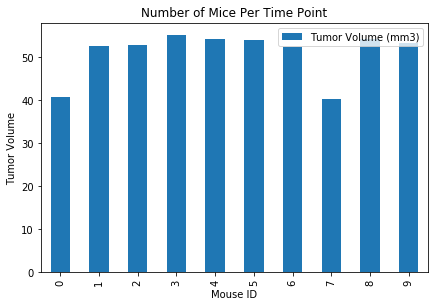

In [41]:
# Generate a bar plot showing the number of mice per time point for each treatment 
#throughout the course of the study using pandas. 
mean_df.plot(kind="bar")
plt.tight_layout()
plt.title("Number of Mice Per Time Point")
plt.xlabel('Mouse ID')
plt.ylabel('Tumor Volume')

TypeError: can only concatenate str (not "int") to str

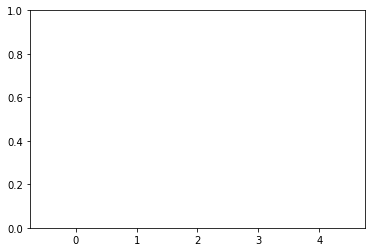

In [121]:
# Generate a bar plot showing the number of mice per time point for each treatment 
#throughout the course of the study using pyplot.

data = SEM_df

# X and Y Axis
x_axis = data['Drug Regimen'].head()
tick_locations = [value for value in x_axis]
plt.xlim(-0.75, len(x_axis)-.25)
plt.ylim(0, max(data)+10)

# Figure Size
plt.figure(figsize=(6,4))
plt.bar(x_axis, data, color = "b", width = .5)
plt.xticks(tick_locations, data.index.values, rotation="vertical")

# Labels
plt.title("Number of Mice Per Time Point")
plt.xlabel("Drug Regimen")
plt.show()

In [ ]:
PIE CHARTS

In [122]:
# Filter Data For Pie Chart 
male_female_df = pd.DataFrame(clean_df.groupby(['Drug Regimen', 'Sex'])['Mouse ID'].count())
male_female_df = male_female_df.reset_index()

# Preview DataFrame
male_female_df.head()

,Drug Regimen,Sex,Mouse ID
0,Capomulin,Female,128
1,Capomulin,Male,102
2,Ceftamin,Female,92
3,Ceftamin,Male,86
4,Infubinol,Female,95


In [123]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

data = male_female_df['Sex']

# Female Vs. Male Pie Chart

labels = ["Male", "Female"]

# The colors of each section of the pie chart
colors = ["red", "blue"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1, 0, 0, 0)

plot = data.plot(kind="pie", explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140, subplots=True)
# Title
plt.title("Female Vs. Male")
plt.show()


TypeError: '<' not supported between instances of 'str' and 'int'

ValueError: could not convert string to float: 'Capomulin'

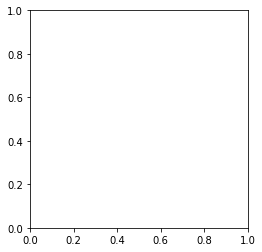

In [124]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

data = male_female_df

plt.pie(data, explode=explode, labels=data.index.values, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Create Equal Axis for 
plt.axis("equal")

# Set a title for the chart
plt.title("Female Vs. Male Distribution")
plt.show()


In [ ]:
QUARTILES OUTLIERS BOXPLOTS

In [72]:
tumor_df = clean_df.pivot(values='Tumor Volume (mm3)', columns='Drug Regimen')
tumor_df.head()

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,45.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,45.651331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,43.270852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,43.784893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,42.731552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
#Calculate the IQR and quantitatively determine if there are any potential outliers.


Drug Regimen,Capomulin,Infubinol,Ketapril,Placebo
0,45.000000,NaN,NaN,NaN
1,45.651331,NaN,NaN,NaN
2,43.270852,NaN,NaN,NaN
3,43.784893,NaN,NaN,NaN
4,42.731552,NaN,NaN,NaN


In [85]:
# Filter Data down to resonable number of Drug Regimens
filtered_df = tumor_df[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]
filtered_df.head()

Drug Regimen,Capomulin,Infubinol,Ketapril,Placebo
0,45.000000,NaN,NaN,NaN
1,45.651331,NaN,NaN,NaN
2,43.270852,NaN,NaN,NaN
3,43.784893,NaN,NaN,NaN
4,42.731552,NaN,NaN,NaN


KeyboardInterrupt: 

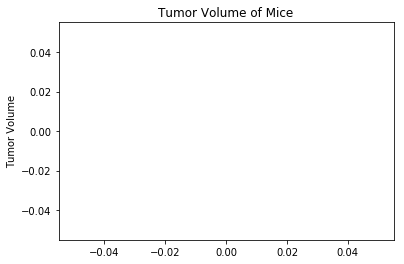

In [77]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

data = filtered_df
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume of Mice')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(data)
plt.show()

In [ ]:
Line and Scatter Plot

In [52]:
# Filter Data to only Capomulin from MERGED DF

tumor_df.head()

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,45.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,45.651331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,43.270852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,43.784893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,42.731552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#tumor_df['Capomulin']
#This is not best option for DF

In [102]:
Capomulin_df = merged_data.loc[(merged_data["Drug Regimen"] == "Capomulin"),:]

In [103]:
Capomulin_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [104]:
Capomulin_Mouse_df = merged_data.loc[(merged_data["Mouse ID"] == "b128"),:]

In [105]:
Capomulin_Mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


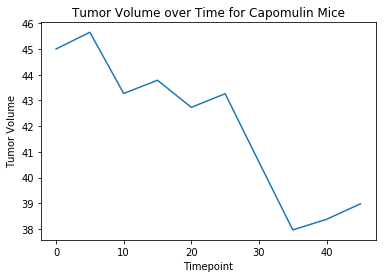

In [106]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Data
Capomulin_Mouse_df 

# Set x and y variables ( TIME POINT VS Tumor Volume)
timepoint = Capomulin_Mouse_df["Timepoint"]
tumor_volume = Capomulin_Mouse_df["Tumor Volume (mm3)"]

# Plot the tumor volume for various mice
tumor_volume = plt.plot(timepoint, tumor_volume)

# Show the chart, add labels
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.title('Tumor Volume over Time for Capomulin Mice')
plt.show()

In [107]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# X and Y Values
mouse_weight = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Weight (g)"].mean()
tumor_volume = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Tumor Volume (mm3)"].mean()


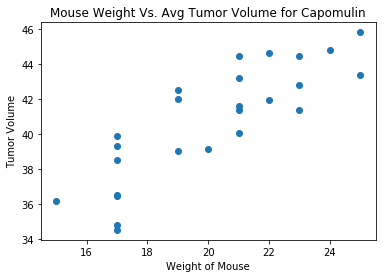

In [108]:
# Plot 
plt.scatter(mouse_weight,tumor_volume)
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
plt.title("Mouse Weight Vs. Avg Tumor Volume for Capomulin")
plt.show()

In [ ]:
Correlation and Regression

In [109]:
 # Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


#Mouse Weight and AVG Tumor Values (use same as scatter plot)
mouse_weight = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Weight (g)"].mean()
tumor_volume = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Tumor Volume (mm3)"].mean()


The correlation between both factors is 0.84


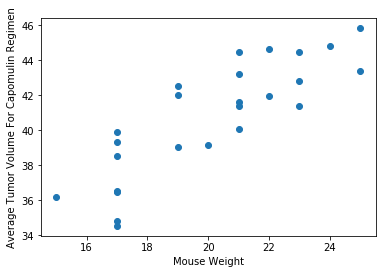

In [110]:

correlation = st.pearsonr(mouse_weight, tumor_volume)
plt.scatter(mouse_weight,tumor_volume)
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume For Capomulin Regimen')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

In [ ]:
# correlation between both factors is 0.84